# 선형회귀 데모

## 라이브러리 import 및 설정

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

## 학습데이터 로드

In [4]:
data_dir = Path('../input/')
trn_file = data_dir / 'train.csv'
seed = 42

In [5]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


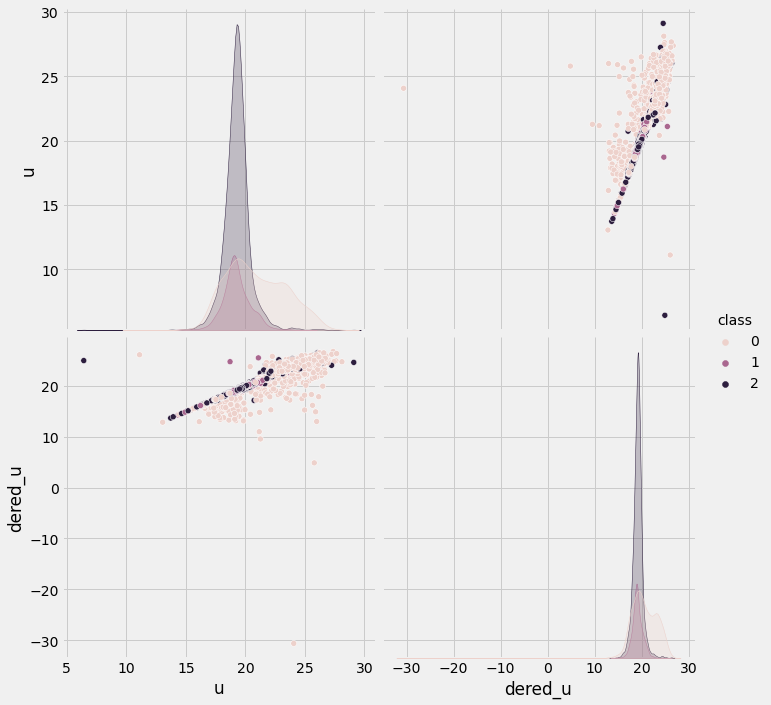

In [6]:
sns.pairplot(trn.sample(n=10000), vars=['u', 'dered_u'], hue='class', size=5)

In [7]:
X = trn[trn['class'] != 0][['u']].values
y = trn[trn['class'] != 0]['dered_u'].values
print(X.shape, y.shape)

(200004, 1) (200004,)


## RMSE 손실함수 정의

In [9]:
rmse = lambda y, p: np.sqrt(np.mean((y - p) ** 2))

## NumPy를 이용한 선형회귀

In [10]:
alpha = .001
theta0 = .1
theta1 = .1
epoch = 4

In [11]:
x = X.flatten()
print(x.shape)

(200004,)


In [12]:
rmses = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(x, y):
        p_i =  theta0 + theta1 * x_i
        theta0 = theta0 + alpha * (y_i - p_i)
        theta1 = theta1 + alpha * (y_i - p_i) * x_i
    rmses.append(rmse(y, theta0 + theta1 * x))

In [13]:
theta1, theta0

(0.9362306162023849, 1.1088813148478316)

In [14]:
rmses

[0.25618215910731906,
 0.25492967552380746,
 0.25461791287963526,
 0.25454708923095914]

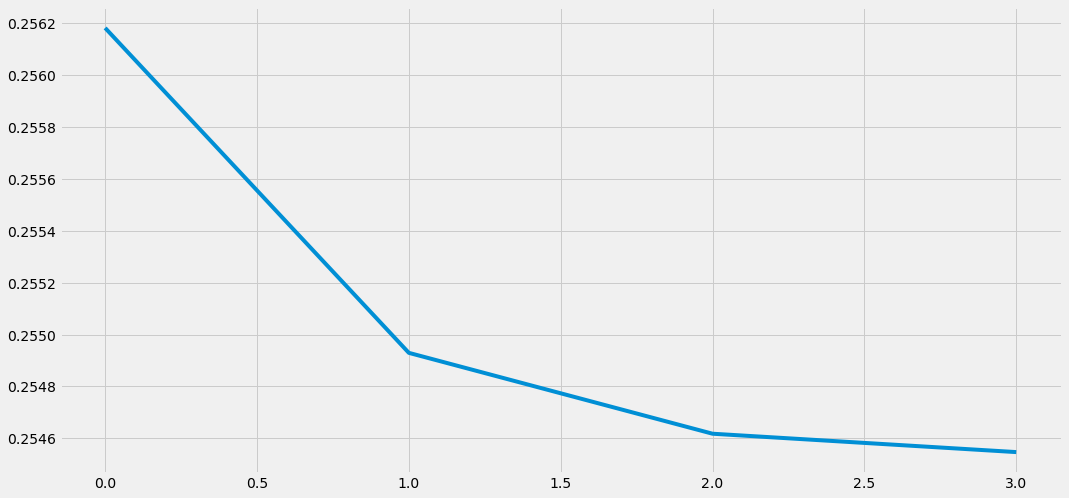

In [15]:
plt.plot(rmses)

Text(0, 0.5, 'dered_u')

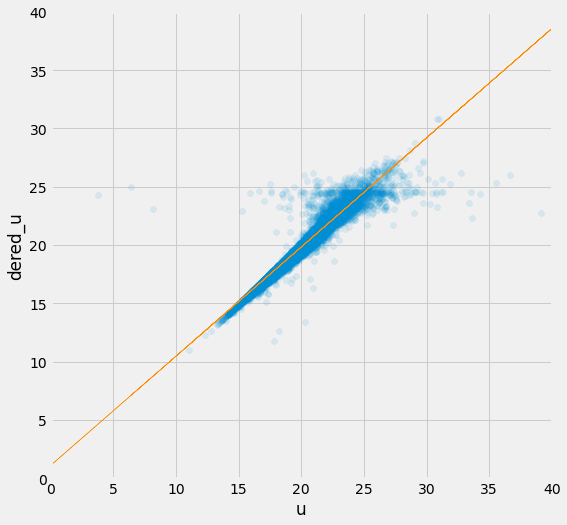

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, theta0 + theta1 * x, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

## scikit-learn을 이용한 선형회귀

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
p = lr.predict(X)

In [18]:
rmse(y, p)

0.2522450693360897

In [19]:
lr.coef_, lr.intercept_

(array([0.9320425]), 1.1556424178625448)

Text(0, 0.5, 'dered_u')

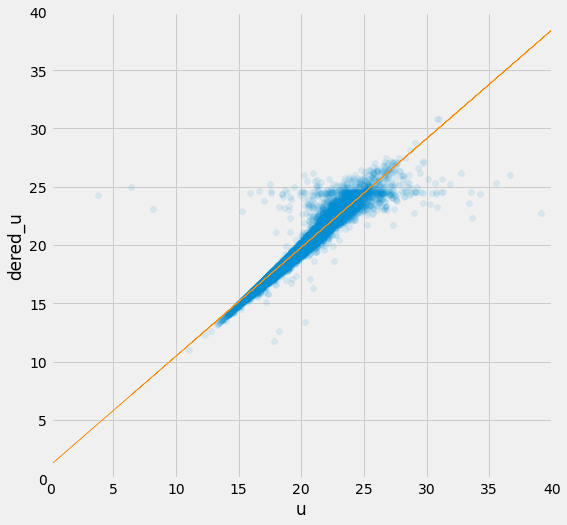

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, p, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

## scikit-learn을 이용한 로지스틱회귀

In [21]:
X = trn[trn['class'] != 0].drop('class', axis=1)
y = trn[trn['class'] != 0]['class'].values - 1

In [22]:
np.unique(y)

array([0, 1], dtype=int64)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr = LogisticRegression()
lr.fit(X, y)
p = lr.predict_proba(X)[:, 1]

In [24]:
lr.coef_, lr.intercept_

(array([[ 0.80801831,  0.0690123 , -1.87284557,  0.51913723, -0.54952923,
         -1.59946167,  2.26775524, -0.05985044, -1.35766453,  0.58803335,
         -0.59540834,  0.09297926, -0.10938564, -0.1439851 , -0.14664114,
         -0.14147526, -0.14271309, -0.14529565]]),
 array([0.22235824]))

In [25]:
log_loss(y, p)

0.3656598201893049

In [26]:
roc_auc_score(y, p)

0.876265418785312

In [28]:
from kaggler.metrics import plot_roc_curve, plot_pr_curve

  Using cached tensorflow-2.4.0-cp38-cp38-win_amd64.whl (370.7 MB)
  Created wheel for kaggler: filename=Kaggler-0.8.12-cp38-cp38-win_amd64.whl size=585368 sha256=fc9f306ec9a3b9ff61d9110f3ac6dd4885d52bf53371514b787cbf463b4a66fb
  Stored in directory: c:\users\leeji\appdata\local\pip\cache\wheels\95\e3\b4\34c0a8b4099e25275ccd41cb0dc37aa4d9535860a1ef670436
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7855 sha256=5ce20024198431a2f6f581cc2d59bbf7c0b959b5d947cf9ab7dc419200a90fca
  Stored in directory: c:\users\leeji\appdata\local\pip\cache\wheels\09\2d\e7\58a96e635aedc543a3a78ff855dc9911d98fc1640e3921c823
  Created wheel for kaggle: filename=kaggle-1.5.10-py3-none-any.whl size=73274 sha256=6865346beae7e4e5e757f6b574088ab9a81a65de6aaddfc4874a971c5e510c17
  Stored in directory: c:\users\leeji\appdata\local\pip\cache\wheels\a6\c1\5e\2b235e19b52c15ad35812881f8de4461399907e219c03bf7b5
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-non

Text(0.5, 1.0, 'Precision-Recall Curve')

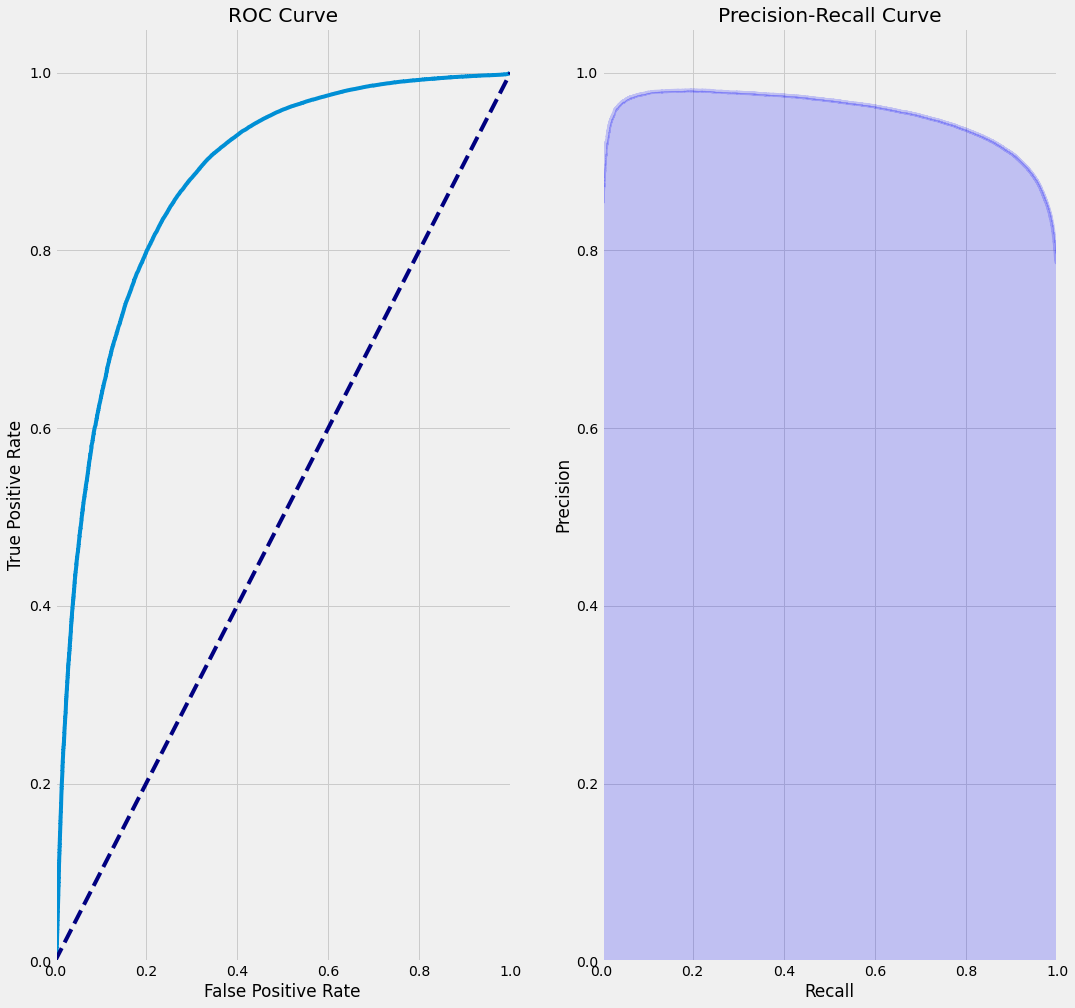

In [30]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plot_roc_curve(y, p);
plt.title('ROC Curve')
plt.subplot(1, 2, 2)
plot_pr_curve(y, p);
plt.title('Precision-Recall Curve')